# Liquidity of Pools Related with Bostrom and Space-Pussy

In [1]:
import pandas as pd
import numpy as np
from math import isnan
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from itertools import chain

from src.data_extractors import get_pools, get_prices, get_price_enriched

#### Get Bostrom, Space-Pussy and Osmosis Pools Data

In [2]:
pools_df = get_pools(display_data=False, bostrom_related_osmo_pools=None)
pools_df = \
    pools_df[
        (pools_df.network.isin(['bostrom', 'space-pussy'])) |
        (pools_df.reserve_coin_denoms.map(lambda denoms: 'boot in osmosis' in denoms or 'hydrogen in osmosis' in denoms))]
pools_df

,network,id,type_id,balances,reserve_coin_denoms,swap_fee
0,bostrom,1,1,"[{'denom': 'boot', 'amount': '12245119767760'}...","[boot, hydrogen]",0.0030
1,bostrom,2,1,"[{'denom': 'boot', 'amount': '495430680822'}, ...","[boot, milliampere]",0.0030
2,bostrom,3,1,"[{'denom': 'boot', 'amount': '74694724384'}, {...","[boot, tocyb]",0.0030
3,bostrom,4,1,"[{'denom': 'hydrogen', 'amount': '844784564440...","[hydrogen, tocyb]",0.0030
4,bostrom,5,1,"[{'denom': 'hydrogen', 'amount': '893306321366...","[hydrogen, milliampere]",0.0030
5,bostrom,6,1,"[{'denom': 'hydrogen', 'amount': '879943996826...","[hydrogen, millivolt]",0.0030
6,bostrom,7,1,"[{'denom': 'hydrogen', 'amount': '103401642460...","[hydrogen, uosmo in bostrom]",0.0030
7,bostrom,8,1,[],"[hydrogen, deprecated uatom in bostrom]",0.0030
8,bostrom,9,1,[],"[uosmo in bostrom, deprecated uatom in bostrom]",0.0030
9,bostrom,10,1,"[{'denom': 'milliampere', 'amount': '763369544...","[milliampere, millivolt]",0.0030


#### Calculate Prices

In [3]:
price_df = get_prices(pools_df=pools_df, display_data=True, zero_fee=True)

,utia in osmosis,aevmos in bostrom,tocyb,pussy,dot in osmosis,udsm in bostrom,weth.grv in bostrom,reth in osmosis,uosmo in bostrom,boot in osmosis,sol in osmosis,uflix in osmosis,uosmo,ujuno in osmosis,ujuno in bostrom,boot,btc in osmosis,millivolt,pussy in bostrom,liquidpussy,ugraviton in bostrom,milliampere(pussy),milliampere,uatom in bostrom,liquidpussy in bostrom,deprecated uatom in bostrom,uion,ugraviton in osmosis,weth in osmosis,tocyb in osmosis,hydrogen in osmosis,aevmos in osmosis,weth.grv in osmosis,millivolt(pussy),uatom in osmosis,usdt in osmosis,hydrogen,uatom,ujuno
utia in osmosis,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aevmos in bostrom,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42260266682.673676,NaN,NaN
tocyb,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.571357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.266954,NaN,NaN
pussy,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.235353,NaN,1328.857237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11020.92596,NaN,NaN,NaN,NaN,NaN
dot in osmosis,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,53.603474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
udsm in bostrom,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.170063,NaN,NaN
weth.grv in bostrom,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reth in osmosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,10833071.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
uosmo in bostrom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,0.028057,NaN,NaN,0.000003,NaN,NaN,NaN,NaN,7.161506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004726,NaN,NaN
boot in osmosis,371.393316,NaN,NaN,NaN,0.018656,NaN,NaN,0.0,NaN,1,29.927696,NaN,35.1681,8.174632,NaN,1,0.014027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309560.0,0.050953,0.0,NaN,0.17023,0.0,0.0,NaN,251.694655,22.335464,NaN,NaN,NaN


#### Prices without References to the Networks

In [4]:
price_enriched_df = get_price_enriched(price_df=price_df, display_data=True)

,utia in osmosis,aevmos in bostrom,tocyb,pussy,dot in osmosis,udsm in bostrom,weth.grv in bostrom,reth in osmosis,uosmo in bostrom,boot in osmosis,sol in osmosis,uflix in osmosis,uosmo,ujuno in osmosis,ujuno in bostrom,boot,btc in osmosis,millivolt,pussy in bostrom,liquidpussy,ugraviton in bostrom,milliampere(pussy),milliampere,uatom in bostrom,liquidpussy in bostrom,deprecated uatom in bostrom,uion,ugraviton in osmosis,weth in osmosis,tocyb in osmosis,hydrogen in osmosis,aevmos in osmosis,weth.grv in osmosis,millivolt(pussy),uatom in osmosis,usdt in osmosis,hydrogen,uatom,ujuno
utia in osmosis,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002693,NaN,NaN,NaN,NaN,NaN,0.002693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000457,NaN,NaN
aevmos in bostrom,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42260266682.673676,NaN,NaN,NaN,NaN,NaN,42260266682.673676,NaN,NaN
tocyb,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1.571357,NaN,NaN,NaN,NaN,NaN,1.571357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.266954,NaN,NaN,NaN,NaN,NaN,0.266954,NaN,NaN
pussy,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,314148.69513,5726.868462,NaN,NaN,314148.69513,NaN,NaN,5726.868462,NaN,NaN,1,0.235353,NaN,1328.857237,NaN,1421069.767847,0.25332,NaN,NaN,NaN,NaN,NaN,972.228096,NaN,NaN,11020.92596,1421069.767847,NaN,972.228096,1421069.767847,NaN
dot in osmosis,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,53.603474,NaN,NaN,NaN,NaN,NaN,53.603474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.105765,NaN,NaN
udsm in bostrom,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.170063,NaN,NaN,NaN,NaN,NaN,0.170063,NaN,NaN
weth.grv in bostrom,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,13699454.029328,NaN,NaN,NaN,NaN,NaN,13699454.029328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2327162.693908,NaN,NaN
reth in osmosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,10833071.0,NaN,NaN,NaN,NaN,NaN,10833071.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1840242.584681,NaN,NaN
uosmo in bostrom,NaN,NaN,NaN,0.000003,NaN,NaN,NaN,NaN,1,0.028057,NaN,NaN,1,NaN,NaN,0.028057,NaN,NaN,0.000003,NaN,NaN,NaN,NaN,7.161506,NaN,NaN,NaN,NaN,NaN,NaN,0.004726,NaN,NaN,NaN,7.161506,NaN,0.004726,7.161506,NaN
boot in osmosis,371.393316,NaN,0.636393,0.000175,0.018656,NaN,0.0,0.0,35.64143,1,29.927696,NaN,35.1681,8.174632,8.174632,1,0.014027,11425.831388,0.000175,NaN,NaN,NaN,1053.92618,254.600233,NaN,NaN,309560.0,0.050953,0.0,0.636393,0.17023,0.0,0.0,NaN,251.694655,22.335464,0.169873,251.694655,8.174632


#### Get Pools Liquidity

network,id,reserve_coin_denoms,"liquidity, GH"
space-pussy,1,"[liquidpussy, pussy]","1,906.0"
space-pussy,3,"[liquidpussy, millivolt(pussy)]",326.0
space-pussy,2,"[liquidpussy, milliampere(pussy)]",152.7
space-pussy,4,"[milliampere(pussy), millivolt(pussy)]",76.1
space-pussy,5,"[milliampere(pussy), pussy]",12.1
space-pussy,6,"[millivolt(pussy), pussy]",1.0
osmosis,597,"[boot in osmosis, uosmo]","12,032.5"
osmosis,912,"[weth in osmosis, boot in osmosis]","11,771.8"
osmosis,1326,"[hydrogen in osmosis, boot in osmosis]","4,453.2"
osmosis,1306,"[btc in osmosis, boot in osmosis]","4,101.5"


Total liquidity: 332,165 GH


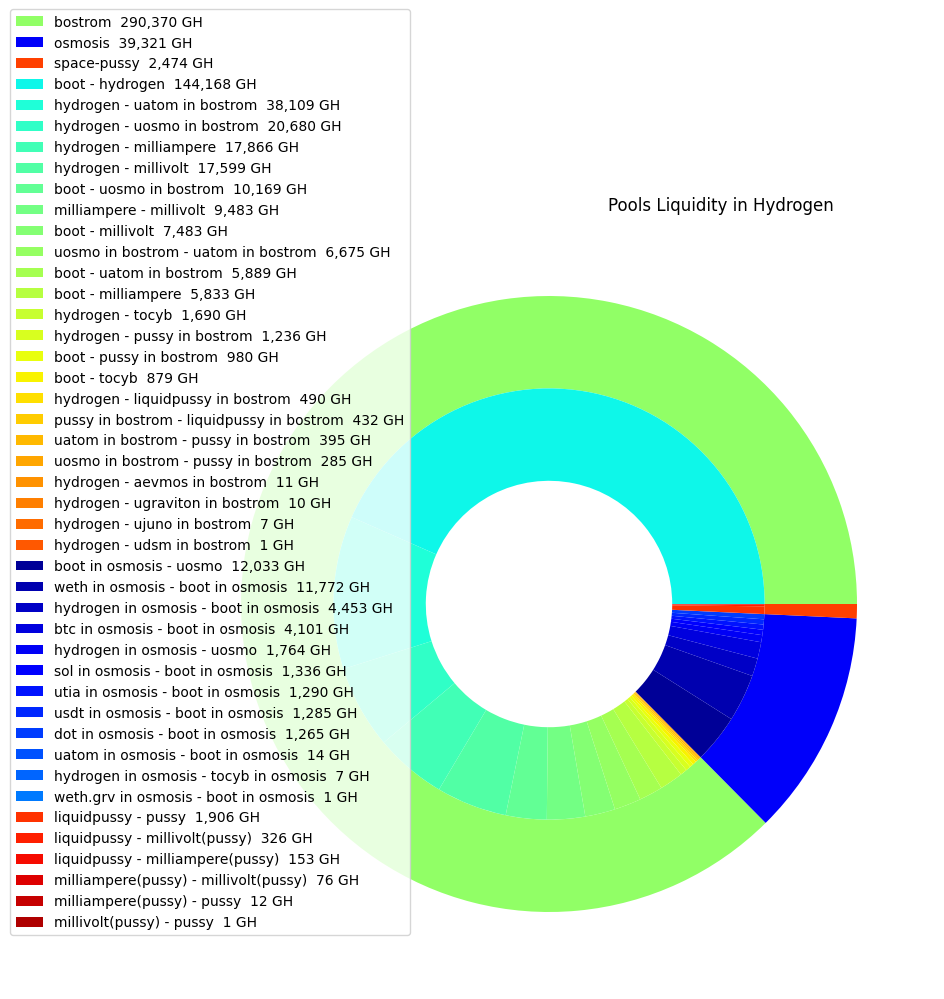

In [5]:
def get_pool_liquidity(balances: list, target_denom: str = 'hydrogen',
                       price_enriched_df: pd.DataFrame = price_enriched_df) -> float:
    if not balances:
        return 0
    denoms = [item['denom'] for item in balances]
    balances_dict = {item['denom']: int(item['amount']) for item in balances}
    if target_denom in denoms:
        return balances_dict[target_denom] * 2
    if not isnan(price_enriched_df.loc[target_denom, denoms[0]]):
        return balances_dict[denoms[0]] * price_enriched_df.loc[target_denom, denoms[0]] * 2
    if not isnan(price_enriched_df.loc[target_denom, denoms[1]]):
        return balances_dict[denoms[1]] * price_enriched_df.loc[target_denom, denoms[1]] * 2
    return 0


pools_df['liquidity, GH'] = pools_df['balances'].map(get_pool_liquidity) / 1e9
display(HTML(
    pools_df[['network', 'id', 'reserve_coin_denoms', 'liquidity, GH']]
    .sort_values(['network', 'liquidity, GH'], ascending=False)
    .to_html(index=False, notebook=True, show_dimensions=False, float_format='{0:7,.1f}'.format)
    .replace('text-align: left;', 'text-align: right')
    .replace('<tr>', '<tr align="right">')))

print(f"Total liquidity: {round(sum(pools_df['liquidity, GH'])):>,} GH")

fig, ax = plt.subplots(figsize=(10, 10))
size = 0.3
cm = plt.get_cmap("jet", 20)
cm2 = plt.get_cmap("jet", 50)
cout = cm(np.array([10, 2, 16]))


pools_df['denoms'] = pools_df.reserve_coin_denoms.map(lambda x: f'{x[0]} - {x[1]}')
outer = pools_df.groupby('network')['liquidity, GH'].sum().sort_index(
        axis=0, level=[0], ascending=[True], inplace=False)
inner = pools_df[pools_df['liquidity, GH'] > 1].groupby(
    ['network', 'denoms'])['liquidity, GH'].sum().sort_values(ascending=False).sort_index(
        axis=0, level=[0], ascending=[True], inplace=False)
inner_labels = ['{1}  {2:>,.0f} GH'.format(i[0], i[1], j) for i, j in zip(inner.index, inner)]
outer_labels = ['{0}  {1:>,.0f} GH'.format(i, j) for i, j in zip(outer.index, outer)]
inner_cnt = inner.groupby('network').count().to_dict()
cin = cm2(np.array(
    list(range(18, 18 + inner_cnt['bostrom'])) + 
    list(range(1, 1 + inner_cnt['osmosis'])) + 
    list(range(42, 42 + inner_cnt['space-pussy']))))
ax.pie(outer.values.flatten(), radius=1,
       labeldistance=0.73,
       wedgeprops=dict(width=size), colors=cout)
ax.pie(inner.values.flatten(),
       radius=1-size,
       wedgeprops=dict(width=size),
       labeldistance=0.5, colors=cin)

ax.set_title('Pools Liquidity in Hydrogen'+' '*19, loc='right')

plt.legend(outer_labels + inner_labels, loc=(-0.2, 0.07))
handles, labels = ax.get_legend_handles_labels()
plt.show()

pools_df.to_csv('data/pools_liquidity.csv')

### Liquidity by Coins

Liquidity by Coins


coin,network,"liquidity, GH"
hydrogen,bostrom,1.209335e+05
boot,bostrom,8.770086e+04
uatom in bostrom,bostrom,2.553367e+04
uosmo in bostrom,bostrom,1.890446e+04
boot in osmosis,osmosis,1.877478e+04
millivolt,bostrom,1.728265e+04
milliampere,bostrom,1.659102e+04
uosmo,osmosis,6.898357e+03
weth in osmosis,osmosis,5.885894e+03
hydrogen in osmosis,osmosis,3.112373e+03


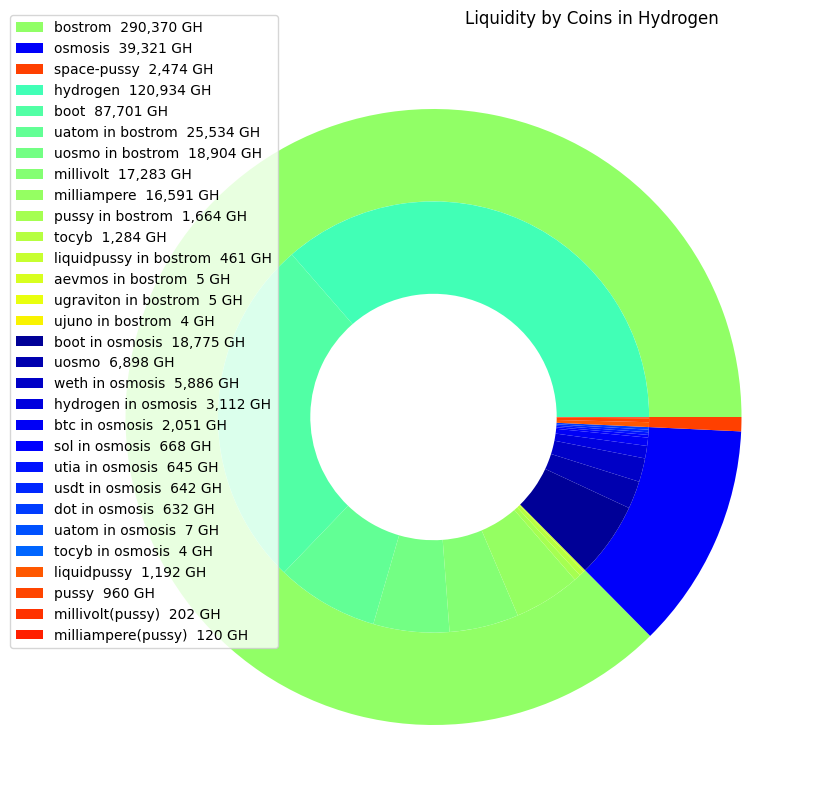

In [6]:
coin_list = set(chain(*pools_df.reserve_coin_denoms.to_list()))
coin_liquidity_data = []
coin_liquidity_df = pd.DataFrame(columns=['coin', 'network', 'liquidity, GH'])
for coin_denom in coin_list:
    pools_liquidity_agg_by_network_df = \
        pools_df[pools_df.reserve_coin_denoms.map(lambda x: coin_denom in x)].groupby('network')['liquidity, GH'].sum() * 0.5
    for network, coin_liquidity in pools_liquidity_agg_by_network_df.items():
        coin_liquidity_data.append({
            'coin': coin_denom,
            'network': network,
            'liquidity, GH': coin_liquidity})
coin_liquidity_df = pd.DataFrame(coin_liquidity_data).sort_values('liquidity, GH', ascending=False).reset_index().drop(columns=['index'])

print('Liquidity by Coins')
display(HTML(
    coin_liquidity_df.to_html(
                index=False, notebook=True, show_dimensions=False)))

fig, ax = plt.subplots(figsize=(10, 10))
size = 0.3
cm = plt.get_cmap("jet", 20)
cm2 = plt.get_cmap("jet", 50)
cout = cm(np.array([10, 2, 16]))

outer = coin_liquidity_df.groupby('network')['liquidity, GH'].sum().sort_index(
        axis=0, level=[0], ascending=[True], inplace=False)
inner = coin_liquidity_df[coin_liquidity_df['liquidity, GH'] > 1].groupby(
    ['network', 'coin'])['liquidity, GH'].sum().sort_values(ascending=False).sort_index(axis=0, level=[0],
                                                                                             ascending=[True],
                                                                                             inplace=False)
inner_labels = ['{1}  {2:>,.0f} GH'.format(i[0], i[1], j) for i, j in zip(inner.index, inner)]
outer_labels = ['{0}  {1:>,.0f} GH'.format(i, j) for i, j in zip(outer.index, outer)]
inner_cnt = inner.groupby('network').count().to_dict()
cin = cm2(np.array(
    list(range(21, 21 + inner_cnt['bostrom'])) + 
    list(range(1, 1 + inner_cnt['osmosis'])) + 
    list(range(40, 40 + inner_cnt['space-pussy']))))
ax.pie(outer.values.flatten(), radius=1,
       labeldistance=0.73,
       wedgeprops=dict(width=size), colors=cout)
ax.pie(inner.values.flatten(), radius=1 - size,
       wedgeprops=dict(width=size),
       labeldistance=0.5, colors=cin)   

ax.set_title('Liquidity by Coins in Hydrogen                   ', loc='right')

plt.legend(outer_labels + inner_labels, loc=(-0.05, 0.2))
handles, labels = ax.get_legend_handles_labels()
plt.show()

# coin_liquidity_df.to_csv('data/coins_liquidity.csv')

In [7]:
price_enriched_df.loc['boot']

utia in osmosis                  371.393316
aevmos in bostrom                       NaN
tocyb                              0.636393
pussy                              0.000175
dot in osmosis                     0.018656
udsm in bostrom                         NaN
weth.grv in bostrom                     0.0
reth in osmosis                         0.0
uosmo in bostrom                   35.64143
boot in osmosis                           1
sol in osmosis                    29.927696
uflix in osmosis                        NaN
uosmo                               35.1681
ujuno in osmosis                   8.174632
ujuno in bostrom                   8.174632
boot                                      1
btc in osmosis                     0.014027
millivolt                      11425.831388
pussy in bostrom                   0.000175
liquidpussy                             NaN
ugraviton in bostrom                    NaN
milliampere(pussy)                      NaN
milliampere                     